In [1]:
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import seaborn as sns
%matplotlib inline
sns.set(style="ticks", color_codes=True)
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 150

In [2]:
df=pd.read_excel('finished.xlsx') 
df.head()

Order# Item Number          Brand                            Item  \
0  781052659  CU1727-100           Nike  Dunk Low Retro SP 'St. John's'   
1  993696776      CP9652  Adidas Yeezy        Yeezy Boost 350 V2 'Bred'   
2  145646199      CP9652  Adidas Yeezy        Yeezy Boost 350 V2 'Bred'   
3  963418140      CP9652  Adidas Yeezy                           350黑红字   
4  481568090      CP9652  Adidas Yeezy                           350黑红字   

                                       Sneaker Name  Size US  Retail Price  \
0                Nike Dunk Retro Be True St. John's      9.5           120   
1   Adidas Yeezy Boost 350 V2 Black Red (2017/2020)      8.0           220   
2   Adidas Yeezy Boost 350 V2 Black Red (2017/2020)      6.0           220   
3  Adidas Yeezy Boost 350 V2\nBlack Red (2017/2020)     11.0           220   
4  Adidas Yeezy Boost 350 V2\nBlack Red (2017/2020)     10.0           220   

   Purchased Price CNY  Purchased Price USD  Sales Price USD  Profit USD  \
0           3032.50788           470.200000           420.73  -49.470000   
1           2438.00000           378.019661           367.34  -10.679661   
2           2438.00000           377.791208           341.09  -36.701208   
3           2438.00000           379.514321           384.10    4.585679   
4           2438.00000           379.514321           373.24   -6.274321   

   Currency Release Date  Sold Date  
0    6.4494   2016-07-01 2019-08-10  
1    6.4494   2017-02-11 2017-10-31  
2    6.4533   2017-02-11 2018-04-28  
3    6.4240   2017-02-11 2021-04-23  
4    6.4240   2017-02-11 2020-11-06

In [3]:
#Dataframe Info

df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7641 entries, 0 to 7640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order#               7641 non-null   int64         
 1   Item Number          7641 non-null   object        
 2   Brand                7641 non-null   object        
 3   Item                 7641 non-null   object        
 4   Sneaker Name         7641 non-null   object        
 5   Size US              7641 non-null   float64       
 6   Retail Price         7641 non-null   int64         
 7   Purchased Price CNY  7641 non-null   float64       
 8   Purchased Price USD  7641 non-null   float64       
 9   Sales Price USD      7641 non-null   float64       
 10  Profit USD           7641 non-null   float64       
 11  Currency             7641 non-null   float64       
 12  Release Date         7641 non-null   datetime64[ns]
 13  Sold Date            7641 non-nul

Order#                 0
Item Number            0
Brand                  0
Item                   0
Sneaker Name           0
Size US                0
Retail Price           0
Purchased Price CNY    0
Purchased Price USD    0
Sales Price USD        0
Profit USD             0
Currency               0
Release Date           0
Sold Date              0
dtype: int64

In [4]:
# Remove - in sneaker name 
df['Sneaker Name'] = df['Sneaker Name'].apply(lambda x: x.replace('-', ' '))
df['Brand'] = df['Brand'].apply(lambda x: x.replace('-', ' '))
#adjust data types
#Release Date and Order Date -> datetime
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Sold Date'] = pd.to_datetime(df['Sold Date'])

In [5]:
#df['Size US'] = pd.to_numeric(df['Size US'],errors = 'coerce')
df['Size US'] = df['Size US'].astype(str)

In [6]:
#Create two additional columns: Time Released, and Profit
#df['Retail Profit'] = (df['Sales Price USD'] - df['Retail Price'])
df['Time Released'] = ((df['Sold Date'] - df['Release Date'])/ np.timedelta64(1, 'M')).astype(int)
df.head()

Order# Item Number          Brand                            Item  \
0  781052659  CU1727-100           Nike  Dunk Low Retro SP 'St. John's'   
1  993696776      CP9652  Adidas Yeezy        Yeezy Boost 350 V2 'Bred'   
2  145646199      CP9652  Adidas Yeezy        Yeezy Boost 350 V2 'Bred'   
3  963418140      CP9652  Adidas Yeezy                           350黑红字   
4  481568090      CP9652  Adidas Yeezy                           350黑红字   

                                       Sneaker Name Size US  Retail Price  \
0                Nike Dunk Retro Be True St. John's     9.5           120   
1   Adidas Yeezy Boost 350 V2 Black Red (2017/2020)     8.0           220   
2   Adidas Yeezy Boost 350 V2 Black Red (2017/2020)     6.0           220   
3  Adidas Yeezy Boost 350 V2\nBlack Red (2017/2020)    11.0           220   
4  Adidas Yeezy Boost 350 V2\nBlack Red (2017/2020)    10.0           220   

   Purchased Price CNY  Purchased Price USD  Sales Price USD  Profit USD  \
0           3032.50788           470.200000           420.73  -49.470000   
1           2438.00000           378.019661           367.34  -10.679661   
2           2438.00000           377.791208           341.09  -36.701208   
3           2438.00000           379.514321           384.10    4.585679   
4           2438.00000           379.514321           373.24   -6.274321   

   Currency Release Date  Sold Date  Time Released  
0    6.4494   2016-07-01 2019-08-10             37  
1    6.4494   2017-02-11 2017-10-31              8  
2    6.4533   2017-02-11 2018-04-28             14  
3    6.4240   2017-02-11 2021-04-23             50  
4    6.4240   2017-02-11 2020-11-06             44

In [7]:
df.describe()

Order#  Retail Price  Purchased Price CNY  Purchased Price USD  \
count  7.641000e+03   7641.000000          7641.000000          7641.000000   
mean   5.524762e+08    117.049470          1114.283563           172.716737   
std    2.577062e+08     58.735258           523.666549            81.210961   
min    1.000077e+08     35.000000           380.000000            58.889164   
25%    3.315310e+08     60.000000           774.150000           120.080969   
50%    5.548875e+08    100.000000           976.000000           151.604585   
75%    7.746535e+08    170.000000          1313.000000           203.461795   
max    9.998133e+08    250.000000          6000.000000           930.246981   

       Sales Price USD   Profit USD     Currency  Time Released  
count      7641.000000  7641.000000  7641.000000    7641.000000  
mean        188.521687    15.804950     6.453070       3.871352  
std          81.873009    32.279535     0.087987       3.802254  
min          63.970000  -375.096981     4.311824       0.000000  
25%         132.940000     8.751783     6.444800       1.000000  
50%         164.620000    15.622145     6.451800       3.000000  
75%         216.920000    25.388184     6.463800       5.000000  
max         658.750000   299.160428     9.898306      50.000000

In [8]:
#Correlation 
#corr = df.corr(method = 'kendall')
#corr

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Drop features 
df.drop('Order#', axis=1, inplace=True)
df.drop('Currency',axis=1, inplace=True)
df.drop('Purchased Price CNY',axis=1, inplace=True)

df.corr()

Retail Price  Purchased Price USD  Sales Price USD  \
Retail Price             1.000000             0.453709         0.477386   
Purchased Price USD      0.453709             1.000000         0.921678   
Sales Price USD          0.477386             0.921678         1.000000   
Profit USD               0.069360            -0.178145         0.217559   
Time Released            0.027523             0.111977         0.025580   

                     Profit USD  Time Released  
Retail Price           0.069360       0.027523  
Purchased Price USD   -0.178145       0.111977  
Sales Price USD        0.217559       0.025580  
Profit USD             1.000000      -0.216838  
Time Released         -0.216838       1.000000

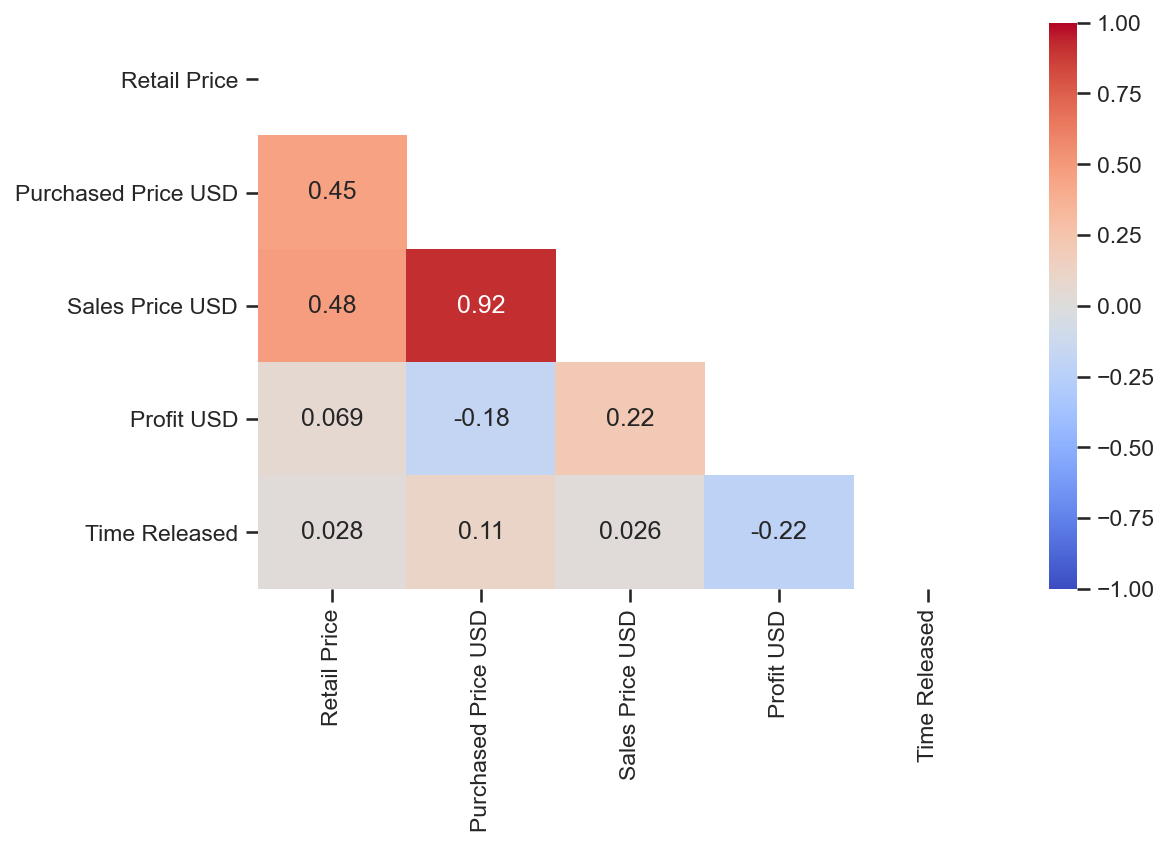

In [9]:
# show heat map of the correlation
upp_mat = np.triu(df.corr())
sns.heatmap(df.corr(), vmin=-1,vmax=+1, annot=True, cmap='coolwarm', mask = upp_mat)
plt.show()

In [10]:
df['Profit USD'].nlargest(n=50)

311     299.160428
122     277.175030
292     247.606508
453     206.235079
452     198.095079
7574    194.991137
7575    194.930697
7271    194.322160
4505    184.607917
144     183.965030
168     183.390000
4509    182.797917
154     182.155030
7273    177.444401
5303    175.100908
455     173.655079
454     172.755079
4506    166.111424
456     165.515079
4510    162.887917
7511    162.411137
2357    159.871729
7290    158.879898
7289    157.228946
7282    156.601648
10      156.560852
4507    154.502336
4517    153.837917
5304    151.397816
4518    149.821424
2127    146.921730
4513    145.168955
7284    144.710148
4512    140.956936
4508    140.932336
986     140.526493
988     139.550982
987     139.308400
985     139.267577
990     138.019793
989     137.788051
7461    137.694177
4561    137.018955
4529    135.208955
4502    134.786724
4503    134.786724
4549    134.326210
4519    133.951386
4544    133.531424
4499    133.328582
Name: Profit USD, dtype: float64

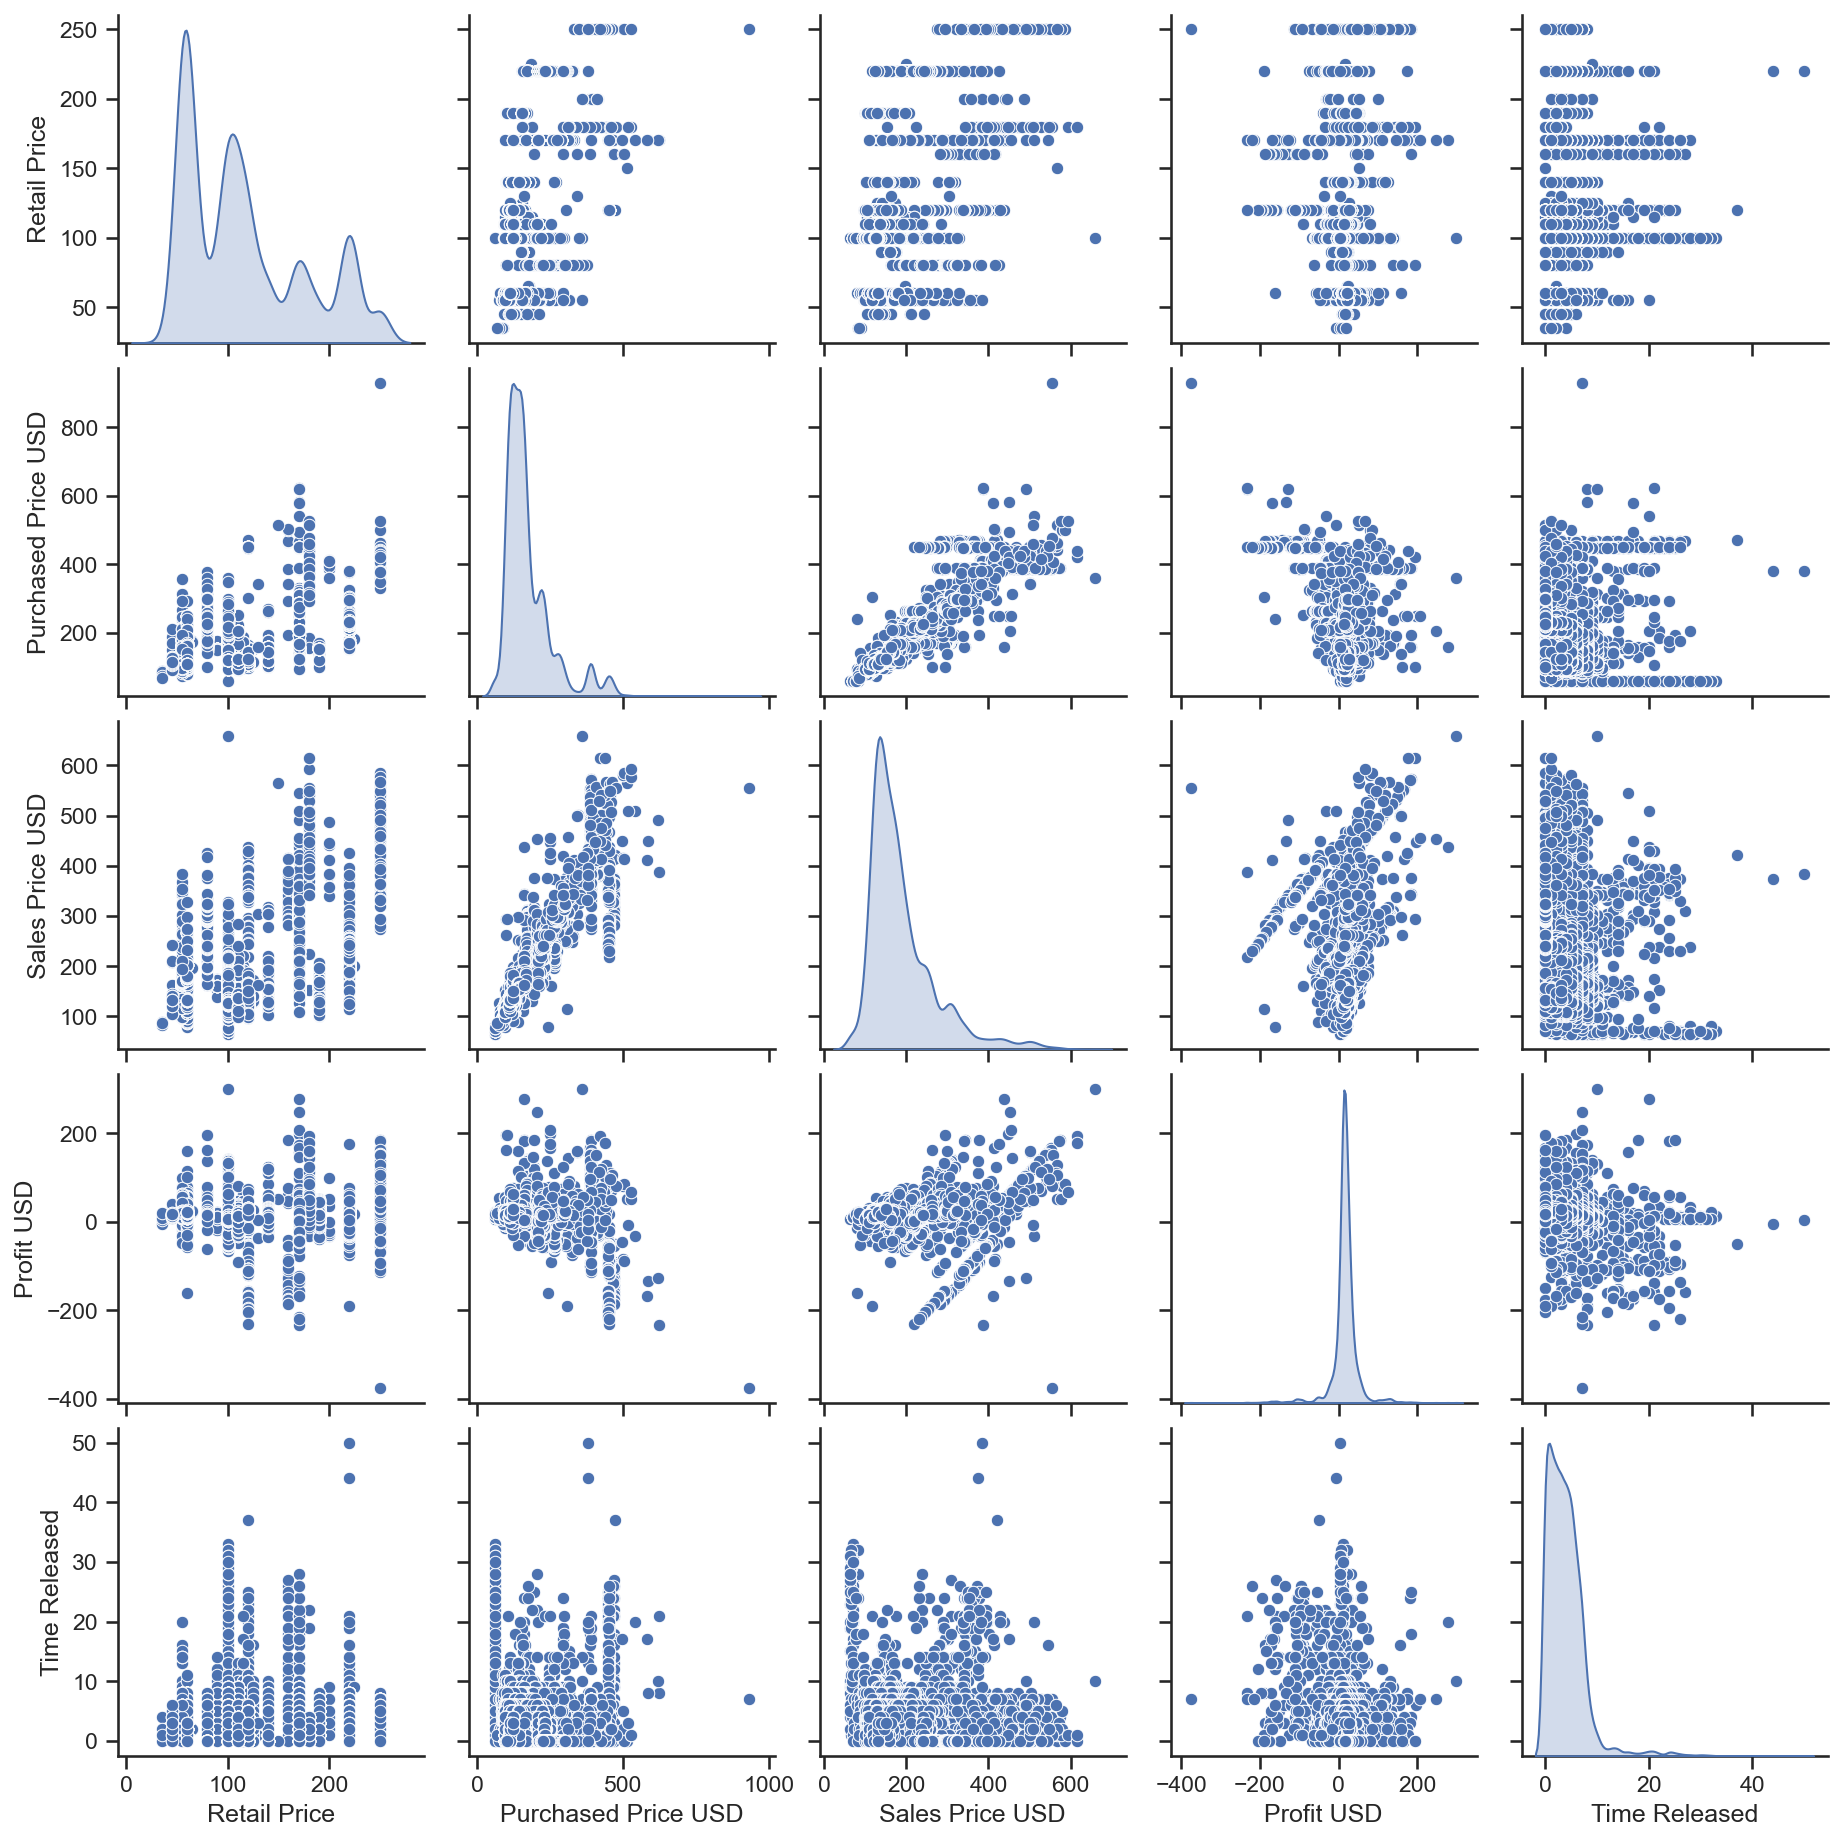

In [11]:
#All variables
sns.pairplot(df,diag_kind='kde')

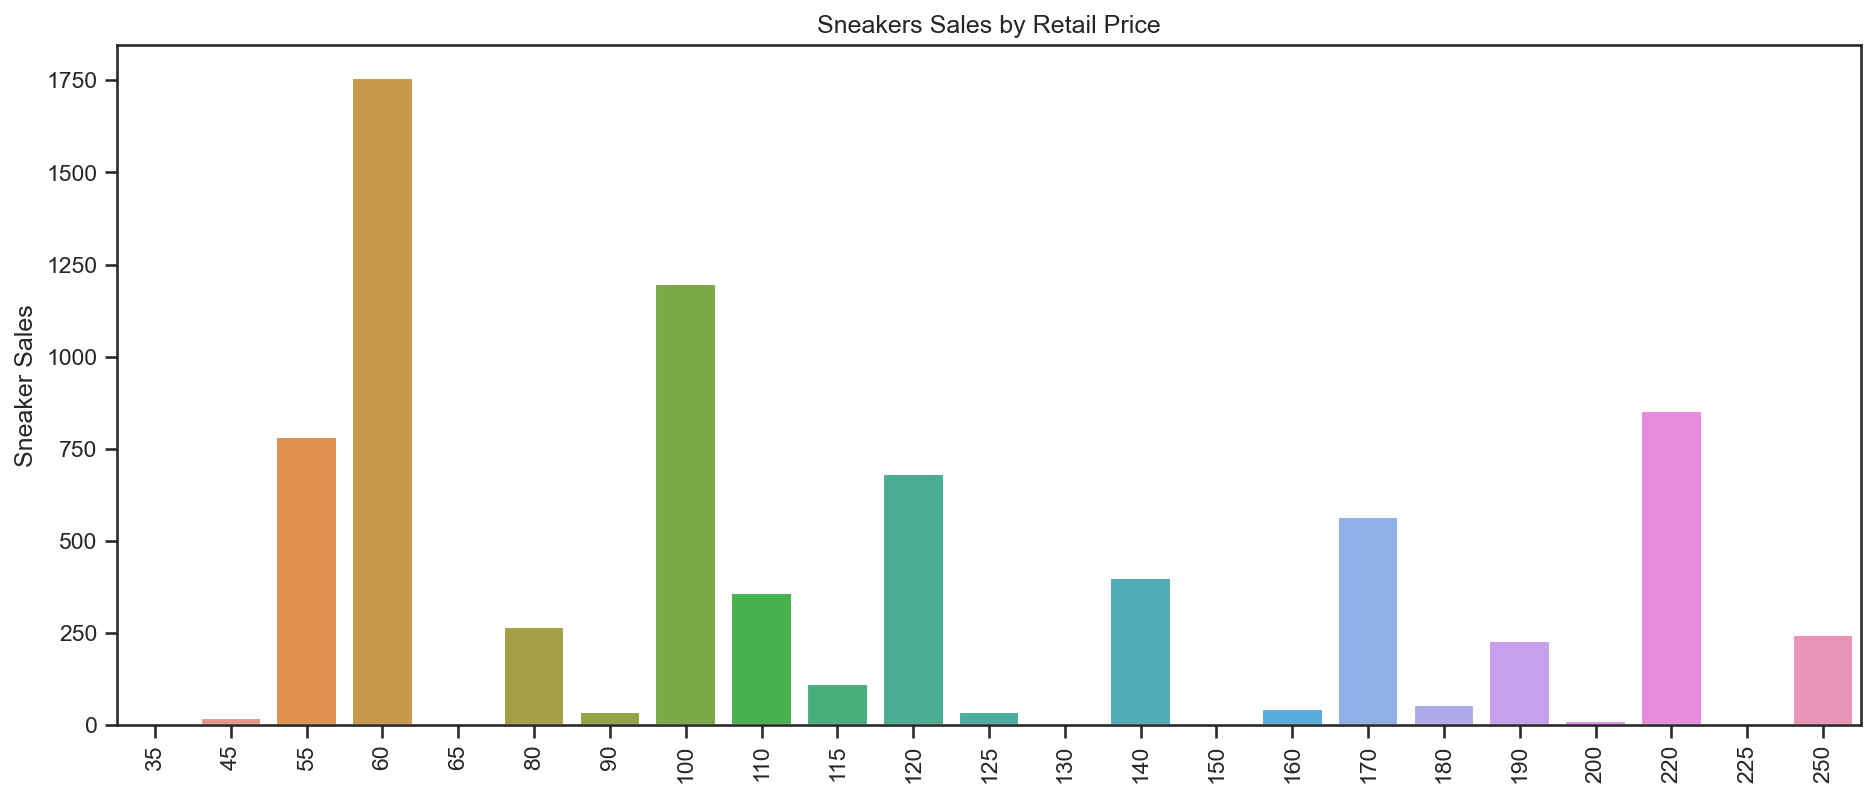

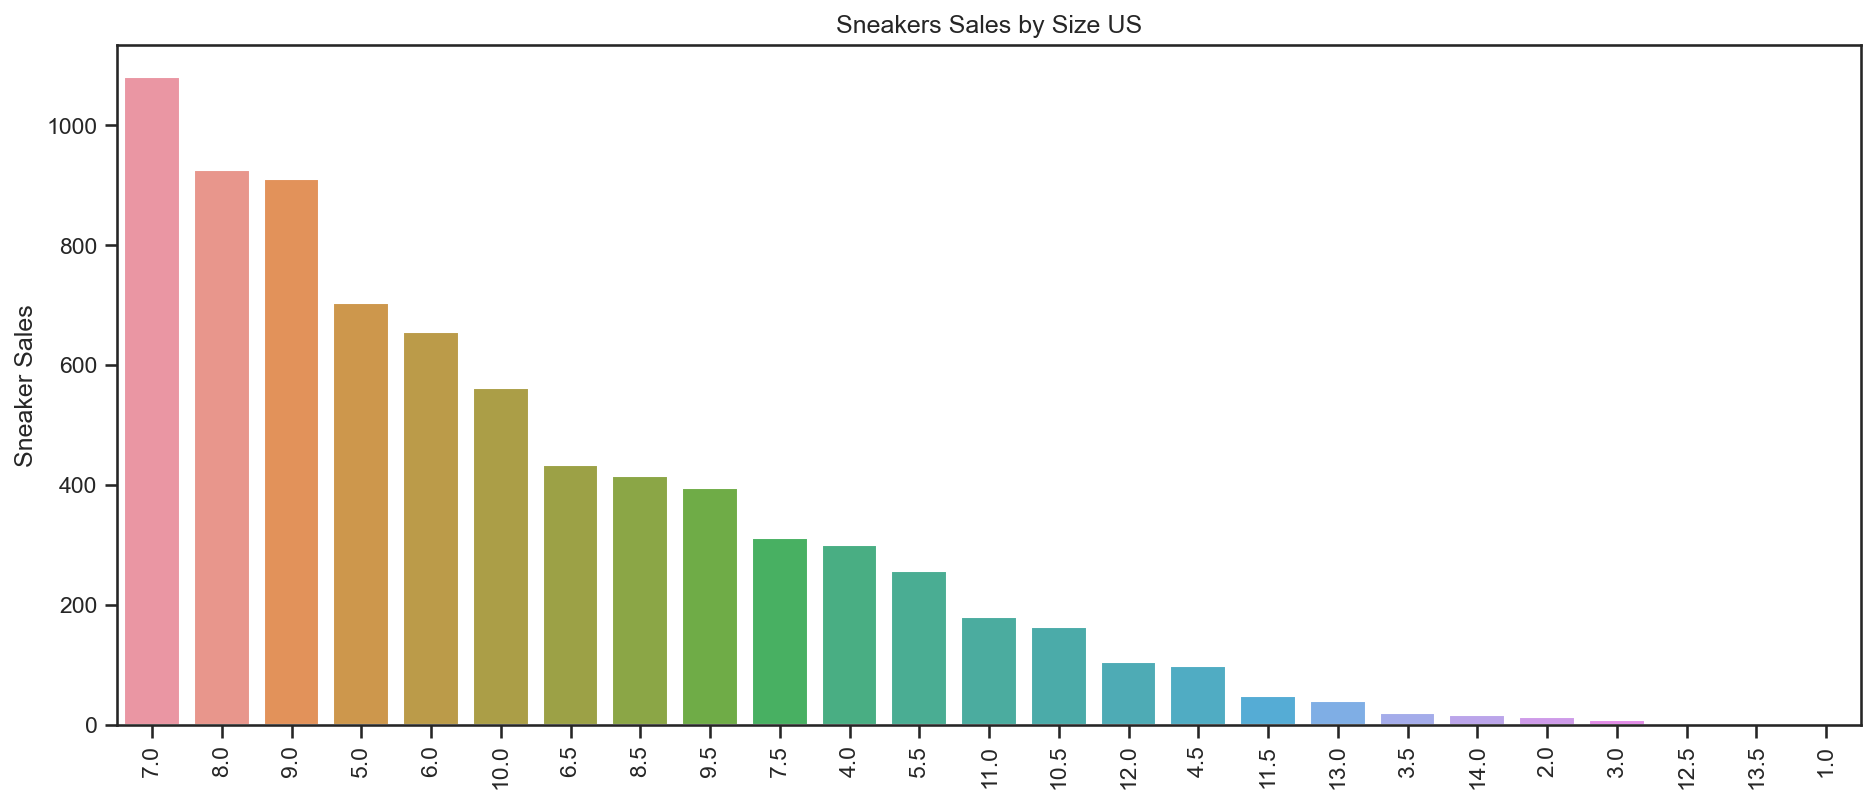

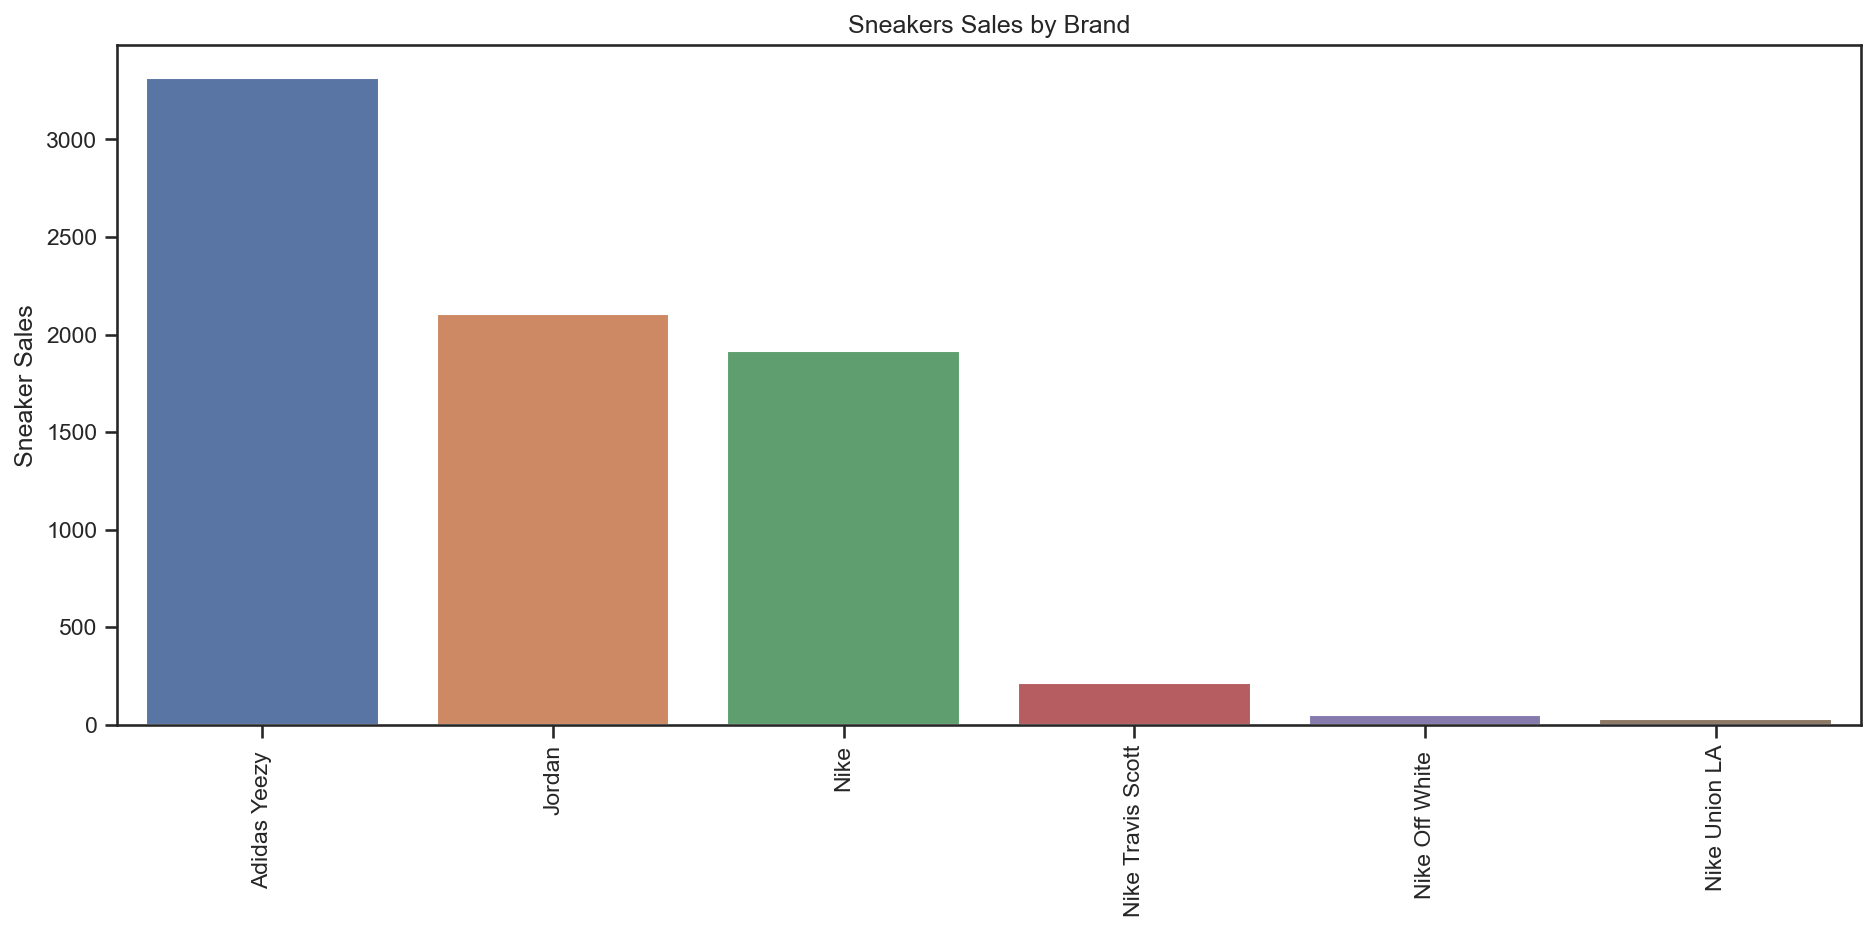

In [12]:
# A combine visualizations on variables in the Dataframe
df_mix = ['Retail Price', 'Size US','Brand' ]
for mix in df_mix:
    mix_num = df[str(mix)].value_counts()
    plt.figure(figsize=(15,6))
    chart = sns.barplot(x = mix_num.index, y= mix_num)
    chart.set_title("Sneakers Sales by %s" % (mix))
    plt.ylabel("Sneaker Sales")
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
    plt.show(15)

In [13]:
df['Sneaker Name'].value_counts()[:50].index.tolist()

['Adidas Yeezy Slide Pure (First Release)',
 'Adidas Yeezy Slide Resin',
 'Jordan 5 Retro Raging Bull Red (2021)',
 'Nike Air Force 1 Low LX UV Reactive (W)',
 'adidas Yeezy Slide Pure (First Release)',
 'Jordan 6 Retro Carmine 2021 (GS)',
 'Adidas Yeezy Boost 350 V2 Mono Cinder',
 'Jordan 6 Retro Travis Scott British Khaki',
 'adidas Yeezy Boost 350 V2 Mono Cinder',
 'Nike Dunk Low SE Easter Candy (W)',
 'adidas Yeezy Slide Resin',
 'Nike Dunk Low Green Glow (W)',
 'Jordan 1 Retro High Hyper Royal Smoke Grey',
 'adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC',
 'Jordan 1 Mid Banned (2020)',
 'Adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC (2021)',
 'adidas Yeezy Foam RNNR Sand',
 'Nike Dunk Low Michigan (2021)',
 'Jordan 1 Retro High Light Army Rust Shadow Patina',
 'Jordan 1 Retro High Shattered Backboard 3.0 (GS)',
 'Nike Dunk High Syracuse (2021)',
 'Nike Blazer Mid 77 Vintage White Black',
 'Nike Dunk Low Michigan State',
 'Jordan 6 RetroCarmine 2021 (GS)',
 'Jor

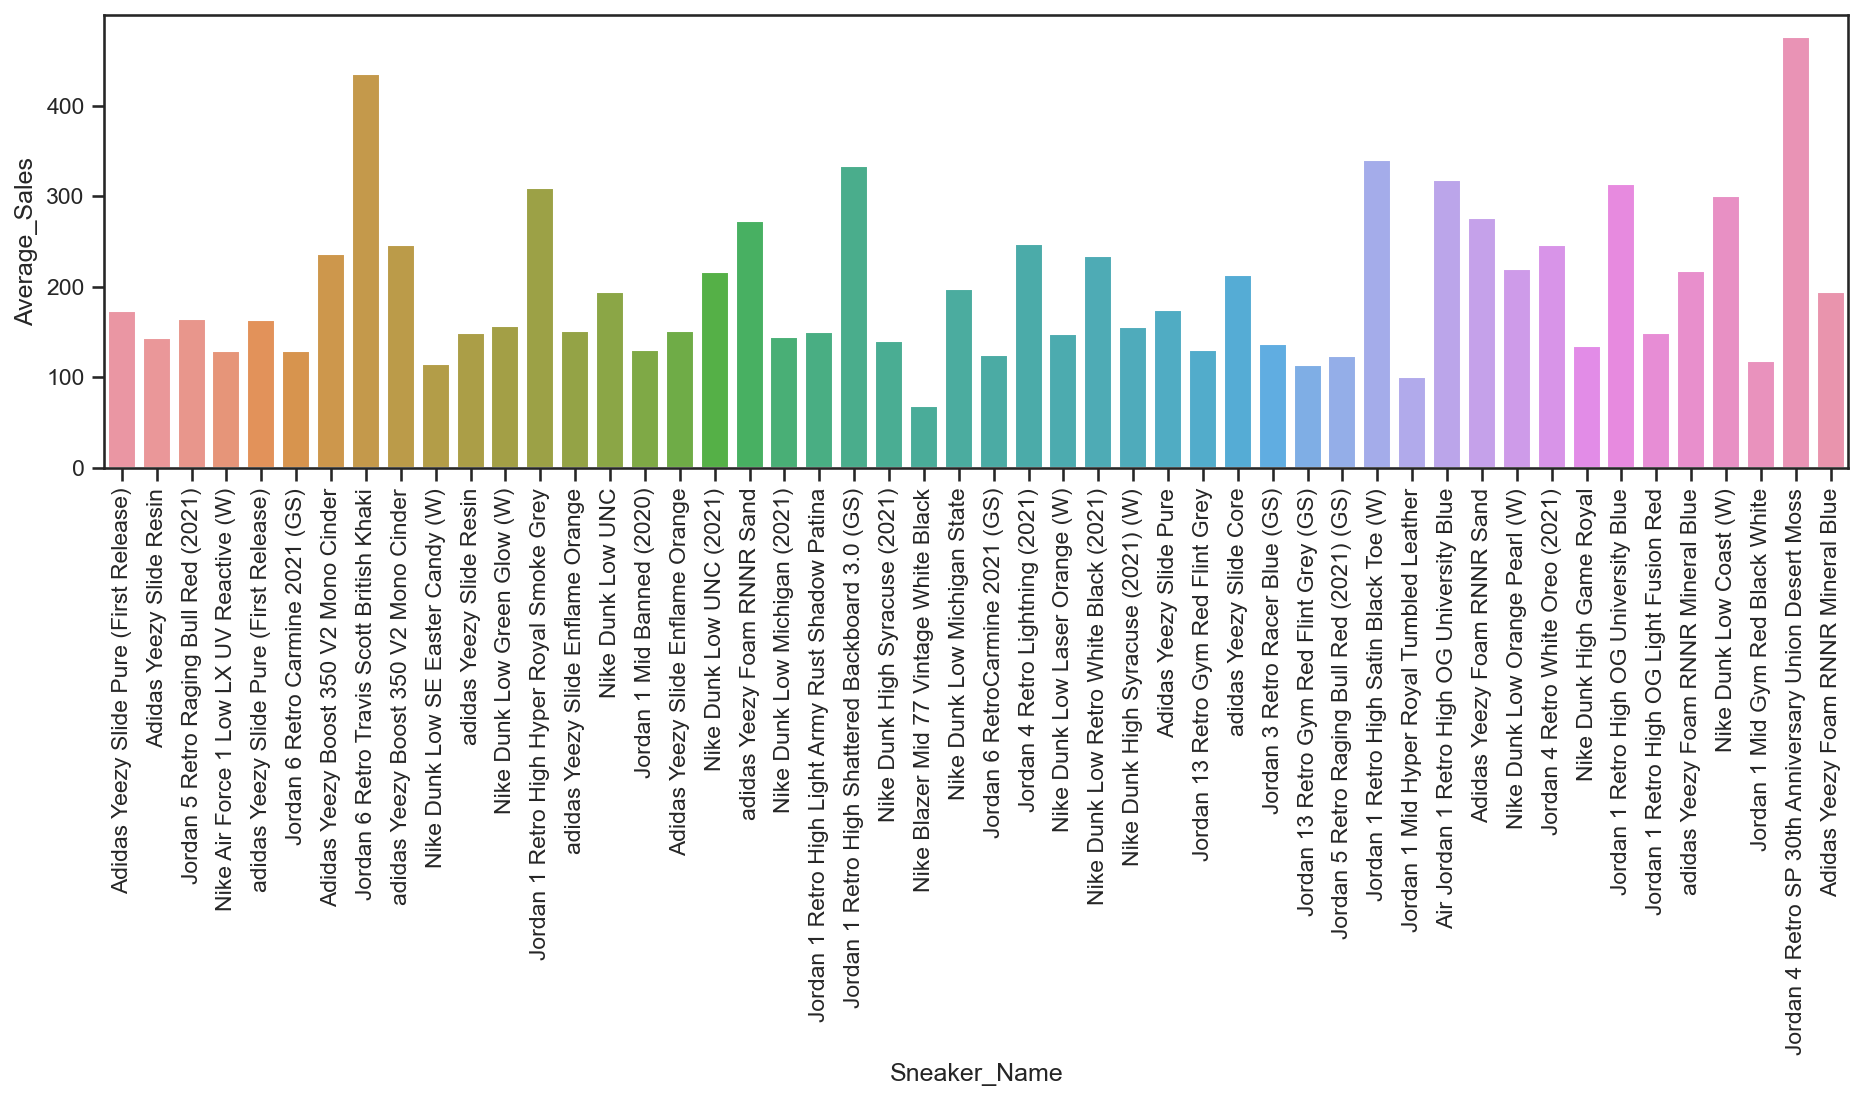

In [14]:
# Analyze trend between Sneaker Name & Sale price
# Create average retail price df
snkr = df[['Sneaker Name', 'Sales Price USD']]

# Clean up this list
sneakernames = ['Adidas Yeezy Slide Pure (First Release)',
 'Adidas Yeezy Slide Resin',
 'Jordan 5 Retro Raging Bull Red (2021)',
 'Nike Air Force 1 Low LX UV Reactive (W)',
 'adidas Yeezy Slide Pure (First Release)',
 'Jordan 6 Retro Carmine 2021 (GS)',
 'Adidas Yeezy Boost 350 V2 Mono Cinder',
 'Jordan 6 Retro Travis Scott British Khaki',
 'adidas Yeezy Boost 350 V2 Mono Cinder',
 'Nike Dunk Low SE Easter Candy (W)',
 'adidas Yeezy Slide Resin',
 'Nike Dunk Low Green Glow (W)',
 'Jordan 1 Retro High Hyper Royal Smoke Grey',
 'adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC',
 'Jordan 1 Mid Banned (2020)',
 'Adidas Yeezy Slide Enflame Orange',
 'Nike Dunk Low UNC (2021)',
 'adidas Yeezy Foam RNNR Sand',
 'Nike Dunk Low Michigan (2021)',
 'Jordan 1 Retro High Light Army Rust Shadow Patina',
 'Jordan 1 Retro High Shattered Backboard 3.0 (GS)',
 'Nike Dunk High Syracuse (2021)',
 'Nike Blazer Mid 77 Vintage White Black',
 'Nike Dunk Low Michigan State',
 'Jordan 6 RetroCarmine 2021 (GS)',
 'Jordan 4 Retro Lightning (2021)',
 'Nike Dunk Low Laser Orange (W)',
 'Nike Dunk Low Retro White Black (2021)',
 'Nike Dunk High Syracuse (2021) (W)',
 'Adidas Yeezy Slide Pure',
 'Jordan 13 Retro Gym Red Flint Grey',
 'adidas Yeezy Slide Core',
 'Jordan 3 Retro Racer Blue (GS)',
 'Jordan 13 Retro Gym Red Flint Grey (GS)',
 'Jordan 5 Retro Raging Bull Red (2021) (GS)',
 'Jordan 1 Retro High Satin Black Toe (W)',
 'Jordan 1 Mid Hyper Royal Tumbled Leather',
 'Air Jordan 1 Retro High OG University Blue',
 'Adidas Yeezy Foam RNNR Sand',
 'Nike Dunk Low Orange Pearl (W)',
 'Jordan 4 Retro White Oreo (2021)',
 'Nike Dunk High Game Royal',
 'Jordan 1 Retro High OG University Blue',
 'Jordan 1 Retro High OG Light Fusion Red',
 'adidas Yeezy Foam RNNR Mineral Blue',
 'Nike Dunk Low Coast (W)',
 'Jordan 1 Mid Gym Red Black White',
 'Jordan 4 Retro SP 30th Anniversary Union Desert Moss',
 'Adidas Yeezy Foam RNNR Mineral Blue']


avgs = []
for name in sneakernames:
    shoerow = snkr.loc[snkr['Sneaker Name'] == name]
    avgs.append(shoerow.mean()[0])
AvgPrice = pd.Series(avgs)
SneakerName = pd.Series(sneakernames)
avgprice_df = pd.DataFrame(columns = ['Sneaker_Name', 'Average_Sales'])
avgprice_df['Sneaker_Name'] = SneakerName
avgprice_df['Average_Sales'] = AvgPrice

# Creating visual of average shoe price
fig_dims = (15, 4)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.barplot(x = avgprice_df['Sneaker_Name'] , y= avgprice_df['Average_Sales'])
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

In [15]:
# Find average sale price by brand
avgs_2 = []
bds = df[['Brand','Sales Price USD']]
brands = ['Nike Off White ','Adidas Yeezy ','Jordan','Nike','Nike Travis Scott','Nike Union LA']
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    avgs_2.append(brandrow['Sales Price USD'].mean())
print('Nike Off White average price: $' + str(avgs_2[0]))
print('Adidas Yeezy average price: $' + str(avgs_2[1]))
print('Jordan average price: $' + str(avgs_2[2]))
print('Nike average price: $' + str(avgs_2[3]))
print('Nike Travis Scott average price: $' + str(avgs_2[4]))
print('Nike Union LA average price: $' + str(avgs_2[5]))

Nike Off White average price: $448.88
Adidas Yeezy average price: $182.4051296743058
Jordan average price: $191.38106413301594
Nike average price: $156.03800312825865
Nike Travis Scott average price: $435.36737327188956
Nike Union LA average price: $476.1065625000001


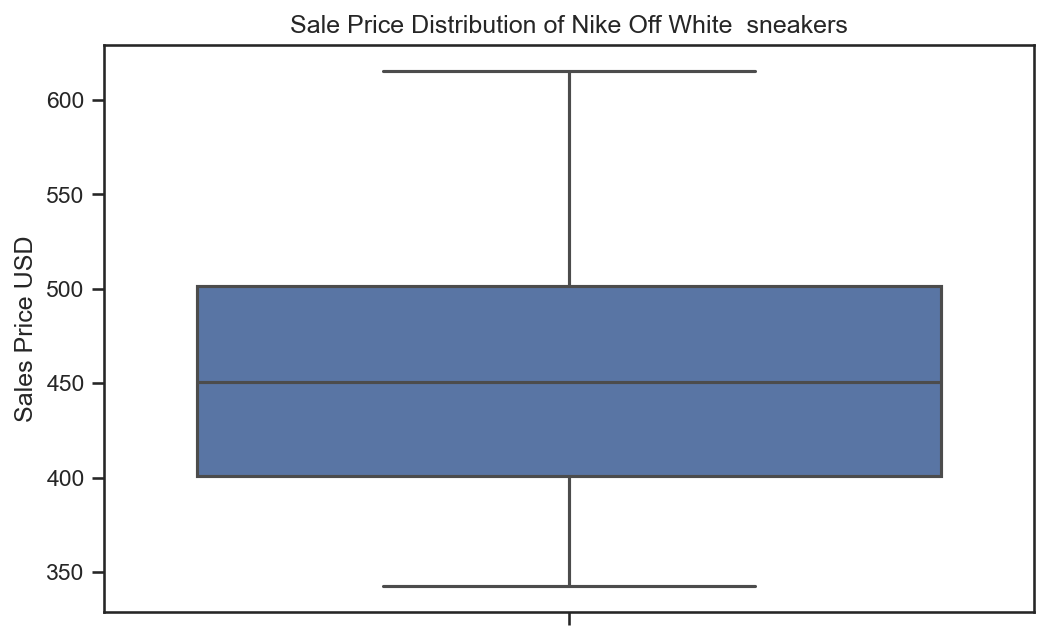

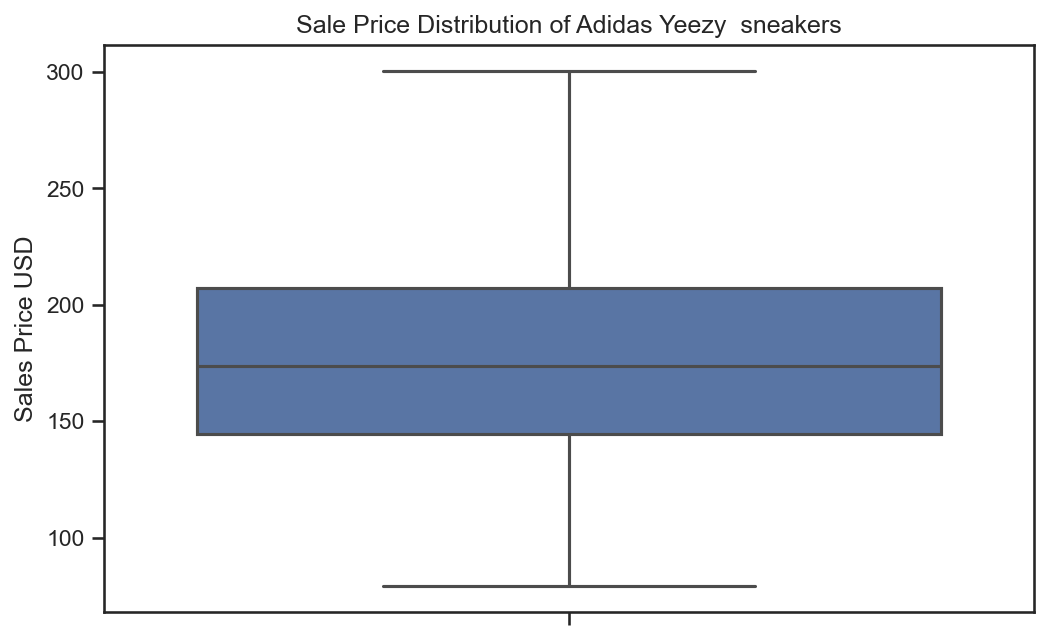

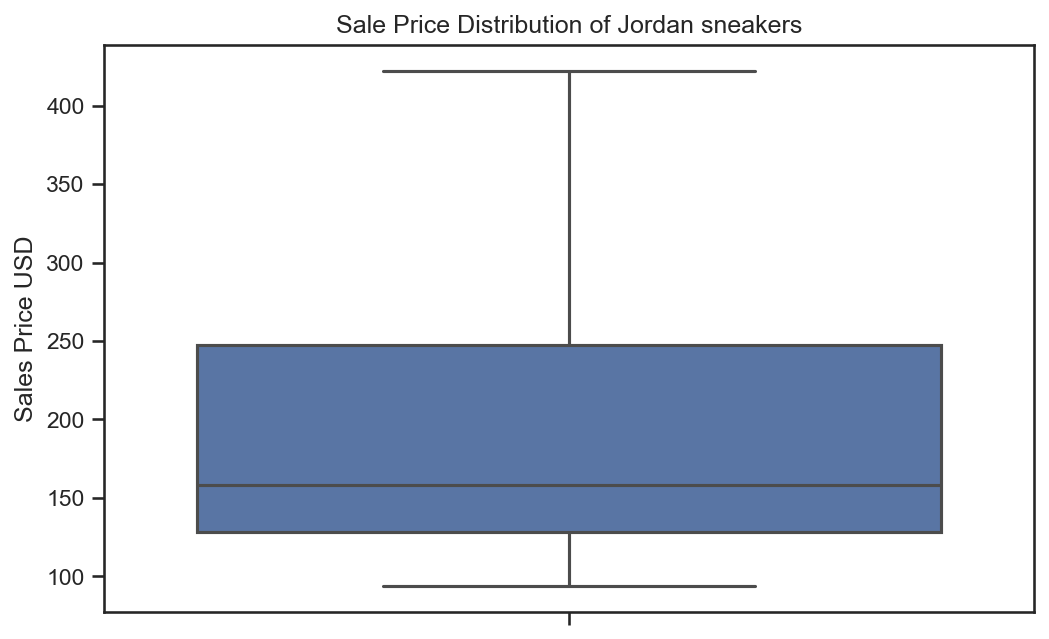

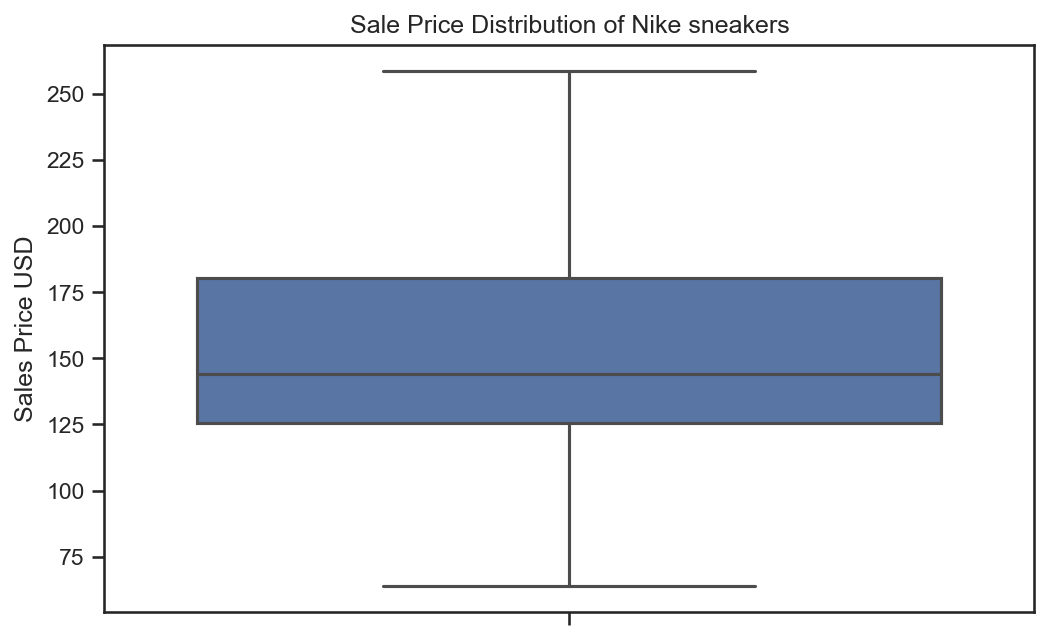

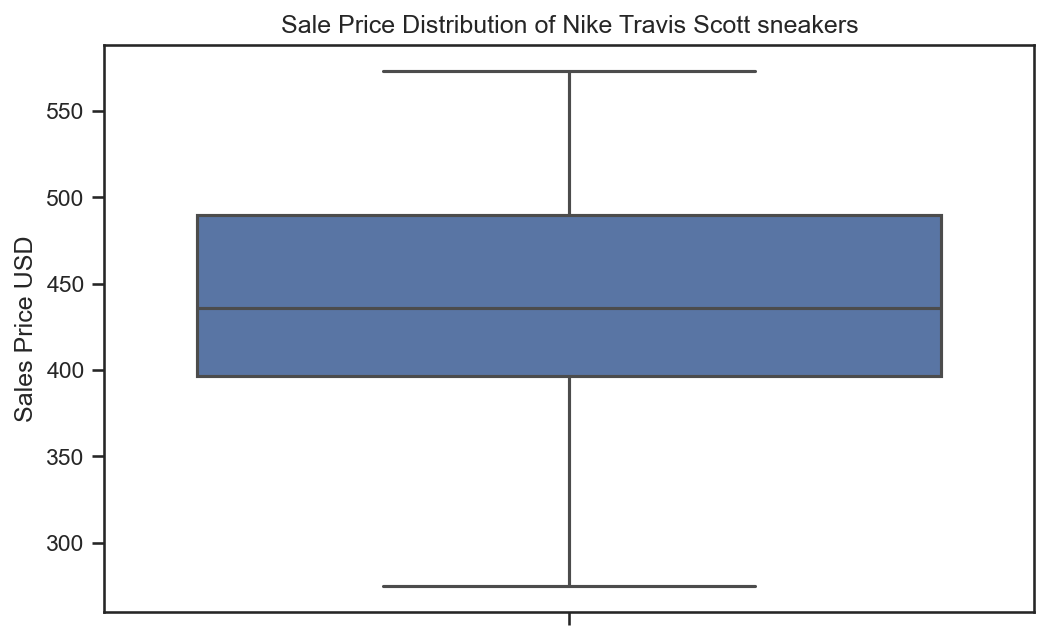

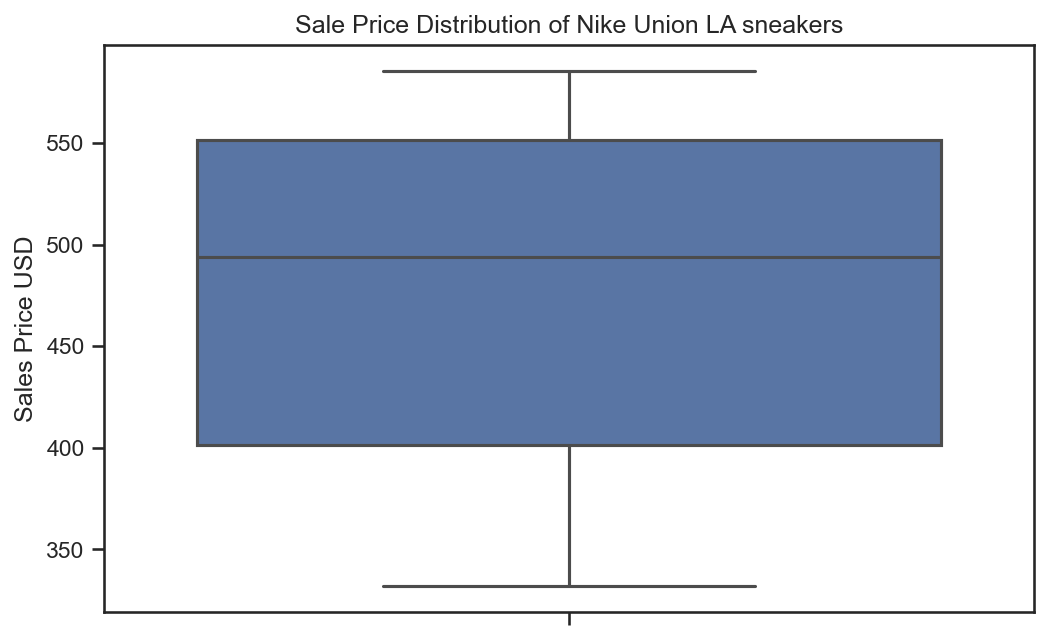

In [16]:
# Create boxplot distribution of sales price by brand
for brand in brands:
    brandrow = bds.loc[bds['Brand'] == str(brand)]
    chart = sns.boxplot(y=brandrow["Sales Price USD"], showfliers = False)
    chart.set_title("Sale Price Distribution of %s sneakers" % (brand))
    plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

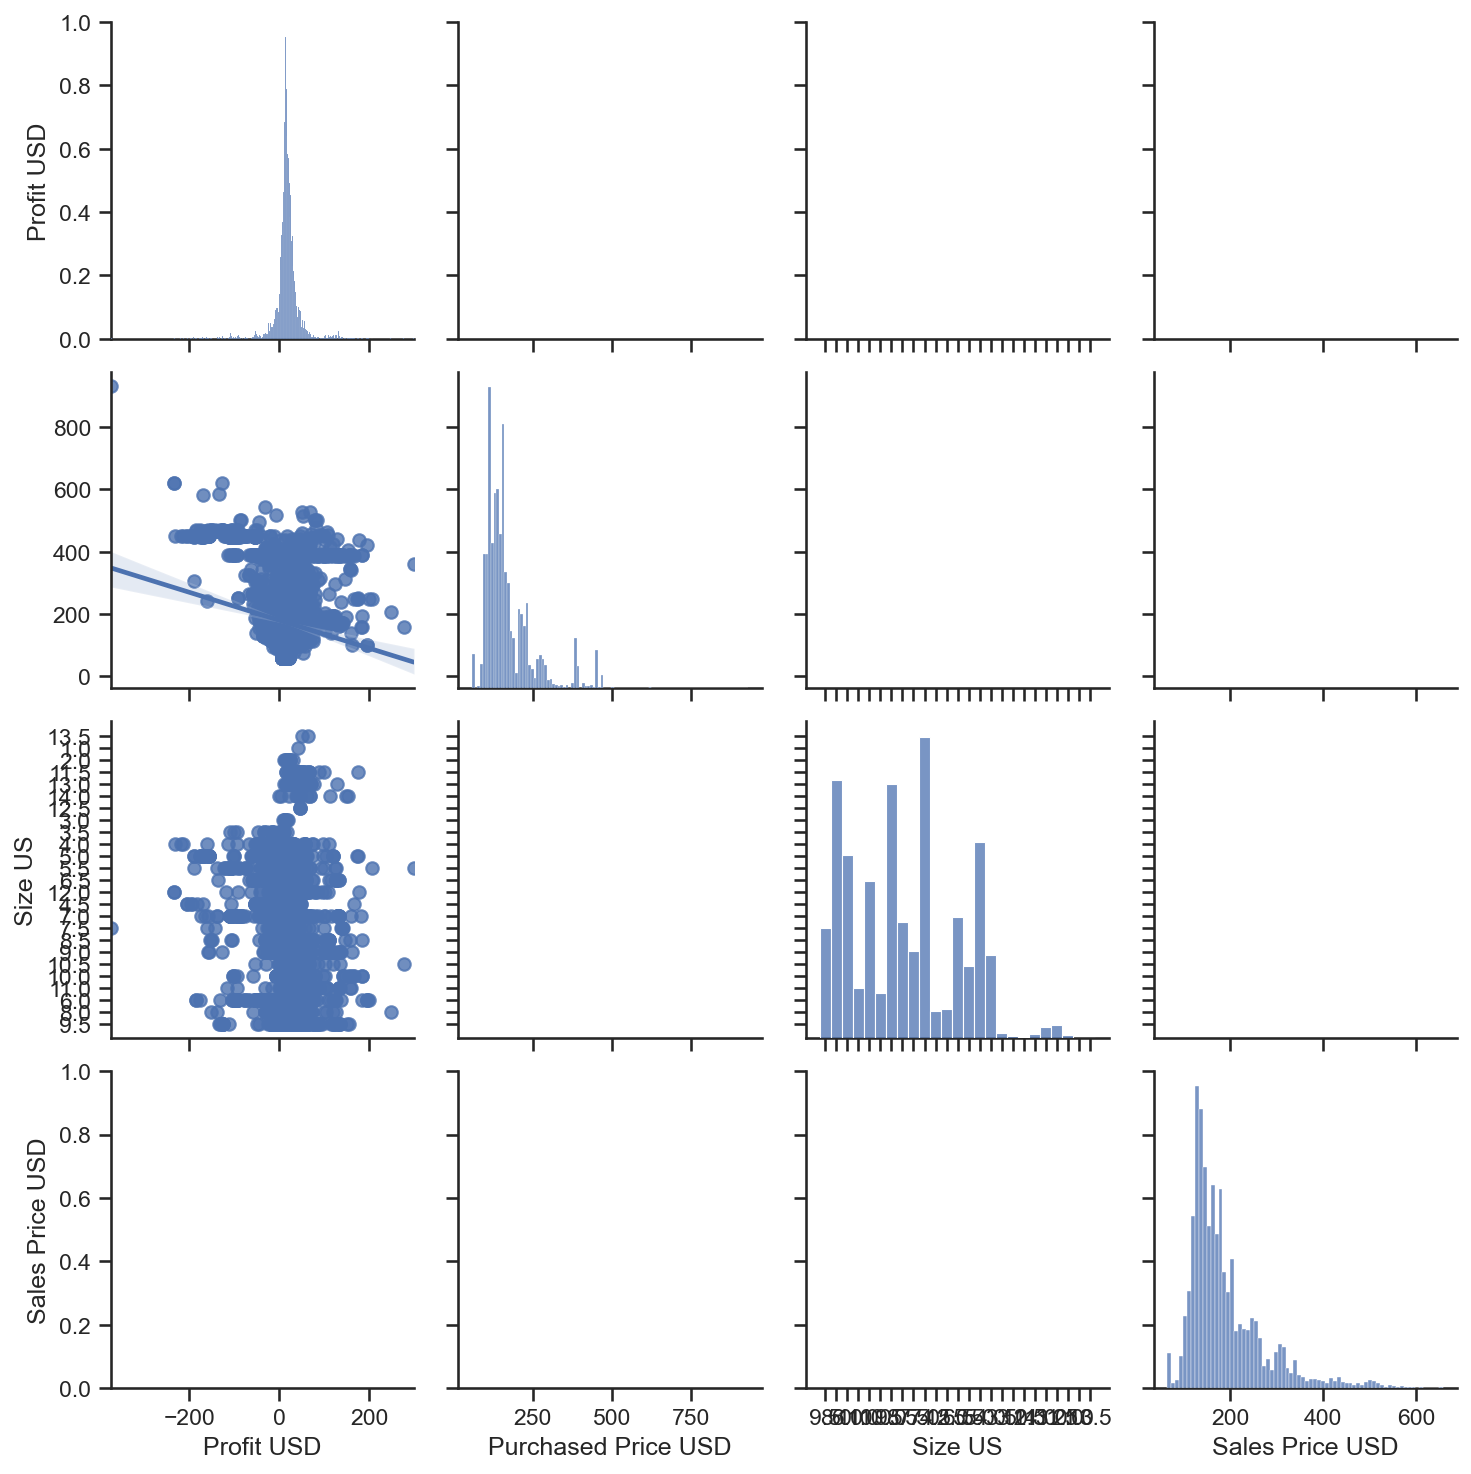

In [17]:
# Plot on Profit, Time Released and Shoe Size
sns.set(style='ticks', color_codes=True)
sns.pairplot(df, vars=['Profit USD', 'Purchased Price USD', 'Size US','Sales Price USD'], kind='reg')
plt.show()

In [ ]:
# Analyze trend between Sales Price and Order Date
# Find average sale price per day
dts = df[['Sold Date', 'Sales Price USD']]
uniq_ord_dates = df['Sold Date'].value_counts().index.tolist()
avg_3 = []

for date in uniq_ord_dates:
    daterow = dts.loc[dts['Sold Date'] == str(date)]
    avg_3.append(daterow['Sales Price USD'].mean())

unq_dates = pd.Series(uniq_ord_dates)
date_avgs = pd.Series(avg_3)
dateprice_df = pd.DataFrame(columns = ['Sold_date', 'Average_Price'])
dateprice_df['Sold_date'] = unq_dates.sort_values(ascending = True)
dateprice_df['Average_Price'] = date_avgs
dateprice_df.head()

In [ ]:
# Create visualization of Average Sale Price Over time
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
chart = sns.scatterplot(x="Sold_date", y="Average_Price", data=dateprice_df)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(200))
chart.set_title("Average Daily Sale Price Over time")

In [ ]:
# Finding Average Sale Price on Release Dates Over Time
dts = df[['Release Date', 'Sales Price USD']]
uniq_rel_dates = df['Release Date'].value_counts().index.tolist()
avg_4 = []

for date in uniq_rel_dates:
    daterow = dts.loc[dts['Release Date'] == str(date)]
    avg_4.append(daterow['Sales Price USD'].mean())

unq_dates = pd.Series(uniq_rel_dates)
date_avgs = pd.Series(avg_4)
dateprice_df_2 = pd.DataFrame(columns = ['Release_date', 'Average_Price'])
dateprice_df_2['Release_date'] = unq_dates.sort_values(ascending = True)
dateprice_df_2['Average_Price'] = date_avgs
dateprice_df_2.head()

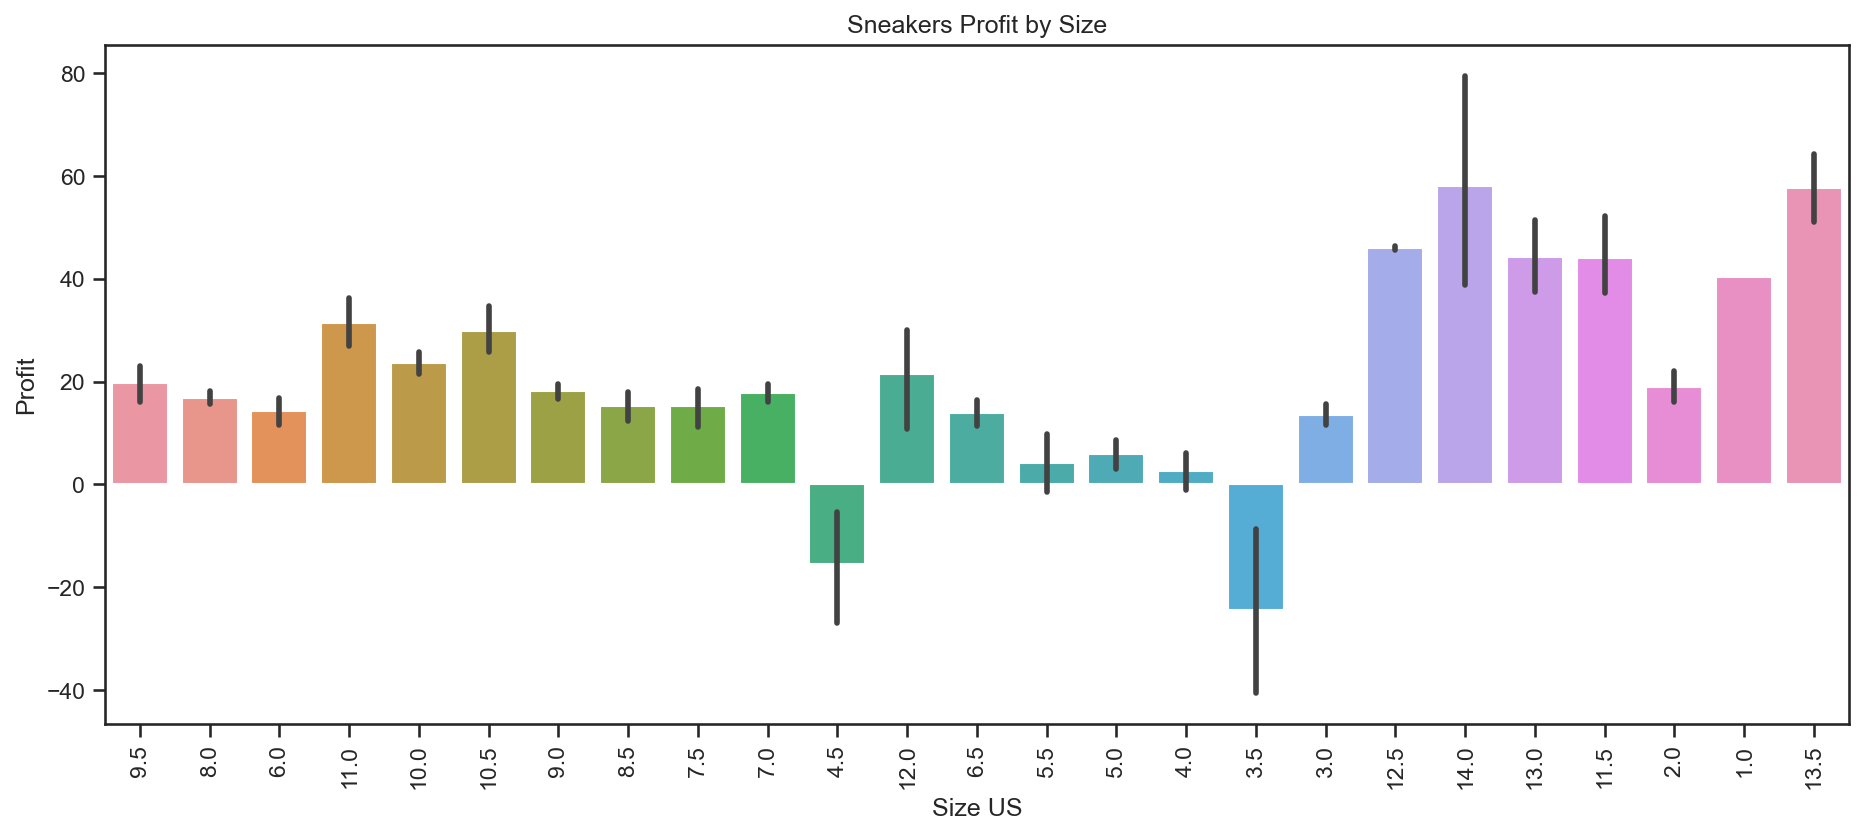

In [18]:
# Create barchart on Size and Profit 
plt.figure(figsize=(15,6))
chart1=sns.barplot(x = 'Size US', y= 'Profit USD', data = df)
chart1.set_title("Sneakers Profit by Size" )
plt.ylabel("Profit")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation = 90)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
plt.show(15)

In [19]:
import altair as alt

alt.data_transformers.disable_max_rows()

source = df

alt.Chart(df).mark_circle(size=60).encode(
    x='Size US',
    y='Profit USD',
    color='Brand',
    tooltip=['Brand','Sneaker Name',
             'Purchased Price USD']).interactive()

alt.Chart(...)

In [20]:
# Renaming columns to get rid of spaces
df = df.rename(columns={
    "Sold Date": "Order_date",
    "Sneaker Name": "Sneaker_Name",
    "Sales Price USD": "Sale_Price",
    "Retail Price": "Retail_Price",
    "Purchased Price USD": "Purchased_Price",
    "Profit USD": "Profit",
    "Release Date": "Release_Date",
    "Size US": "Shoe_Size",
    })

In [21]:
#import necessary libraries 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

#fit simple linear regression model
model = ols('Profit ~ Purchased_Price', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     250.4
Date:                Tue, 05 Apr 2022   Prob (F-statistic):           1.63e-55
Time:                        21:27:01   Log-Likelihood:                -37267.
No. Observations:                7641   AIC:                         7.454e+04
Df Residuals:                    7639   BIC:                         7.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          28.0348      0.854     

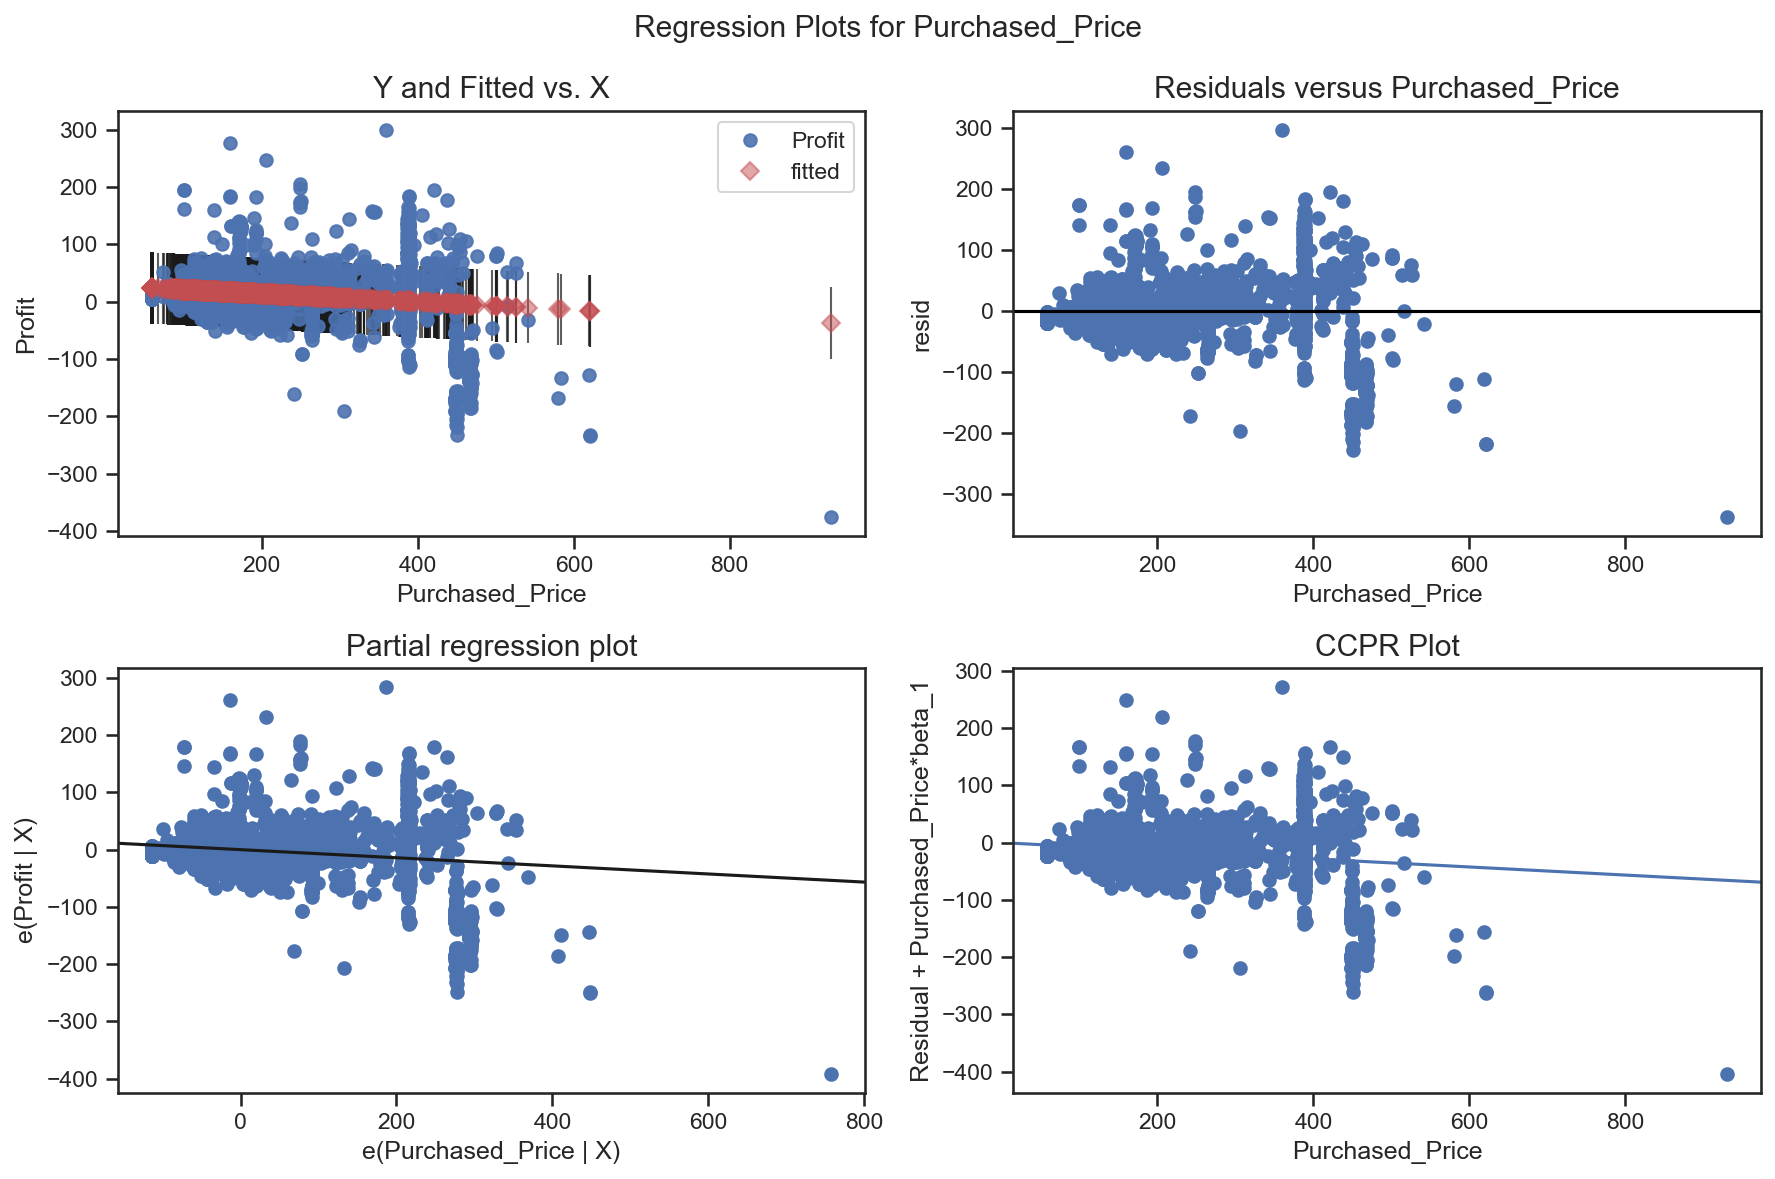

In [22]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Purchased_Price', fig=fig)

In [23]:
#fit multiple linear regression model
model = ols('Profit ~ Purchased_Price + Shoe_Size', data=df).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     37.55
Date:                Tue, 05 Apr 2022   Prob (F-statistic):          6.17e-171
Time:                        21:27:02   Log-Likelihood:                -36946.
No. Observations:                7641   AIC:                         7.394e+04
Df Residuals:                    7615   BIC:                         7.412e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            55.2237     30.51

In [24]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Shoe_Size', fig=fig)

ValueError: 'Shoe_Size' is not in list

<Figure size 1800x1200 with 0 Axes>

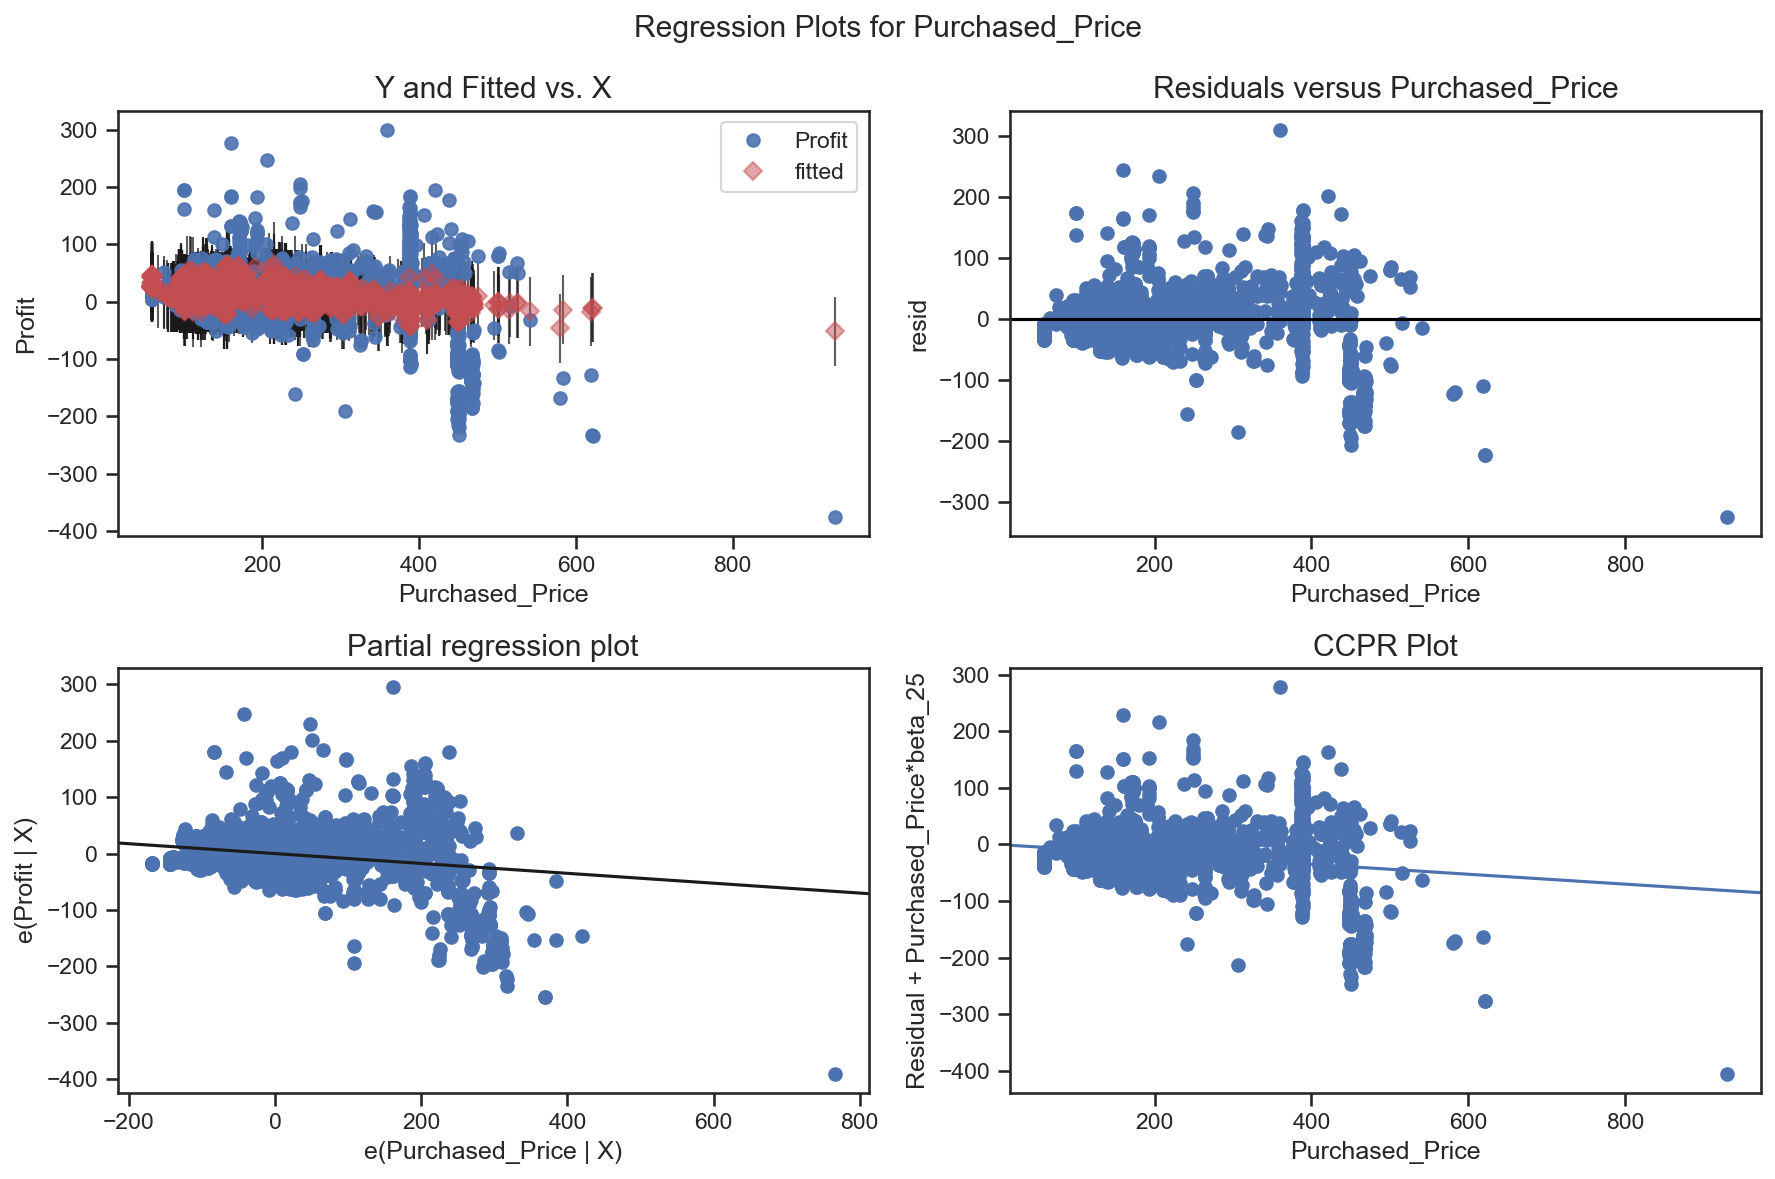

In [25]:
#create residual vs. predictor plot for 'assists'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'Purchased_Price', fig=fig)

In [26]:
# Converting dates into numericals
import datetime as dt

df['Order_date'] = pd.to_datetime(df['Order_date'])
df['Order_date']=df['Order_date'].map(dt.datetime.toordinal)

df['Release_Date'] = pd.to_datetime(df['Release_Date'])
df['Release_Date']=df['Release_Date'].map(dt.datetime.toordinal)

In [43]:
# Getting spltis
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split

X = df.drop(['Item Number','Item','Release_Date','Brand','Sneaker_Name'], axis=1)
y = df.Profit
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [44]:
X_train.head()

Shoe_Size  Retail_Price  Purchased_Price  Sale_Price     Profit  \
3612       4.0            60       100.576494      106.51   5.933506   
3589       4.0            60        90.455377       97.46   7.004623   
7292      10.5           180       343.494930      405.35  61.855070   
5619       4.0            60       102.118296      111.22   9.101704   
6139       9.0           100       171.219550      194.05  22.830450   

      Order_date  Time Released  
3612      738084              5  
3589      738050              4  
7292      738152              4  
5619      738010              1  
6139      738156              6

In [45]:
# Converting categorical data to numerical
from sklearn.preprocessing import OneHotEncoder

object_cols = ['Purchased_Price']
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Adding the column names after one hot encoding
OH_cols_train.columns = OH_encoder.get_feature_names(object_cols)
OH_cols_valid.columns = OH_encoder.get_feature_names(object_cols)

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Model #1



In [46]:
# Starting linear regression
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(OH_X_train,y_train)

LinearRegression()

In [47]:
# Looking at y-int
print(lm.intercept_)

-9.259014536411314e-06


In [48]:
# Looking at coefficient scores of each variable
coeff_df = pd.DataFrame(lm.coef_, OH_X_train.columns,columns=['Coefficient'])
ranked_coeff = coeff_df.sort_values("Coefficient", ascending = False)
ranked_coeff

Coefficient
Profit                              9.999999e-01
Purchased_Price_58.88916439375156   6.281579e-06
Purchased_Price_58.88916439375155   6.281579e-06
Purchased_Price_58.91564210297833   6.280240e-06
Purchased_Price_58.961349283929934  6.277930e-06
Purchased_Price_58.96134928392994   6.277930e-06
Purchased_Price_58.96134928392993   6.277930e-06
Purchased_Price_73.9520499084857    5.520240e-06
Purchased_Price_74.50574250691729   5.492255e-06
Purchased_Price_78.35887243095483   5.297502e-06
Purchased_Price_79.10970581853127   5.259552e-06
Purchased_Price_79.22021481343516   5.253966e-06
Purchased_Price_82.88732830095284   5.068616e-06
Purchased_Price_84.00756378065036   5.011995e-06
Purchased_Price_84.94173562573484   4.964778e-06
Purchased_Price_85.61537986029549   4.930729e-06
Purchased_Price_85.70809740400384   4.926043e-06
Purchased_Price_85.71472777064349   4.925708e-06
Purchased_Price_85.83224684919601   4.919768e-06
Purchased_Price_85.87845372320655   4.917432e-06
Purchased_Price_85.99832501008095   4.911373e-06
Purchased_Price_86.01033054646419   4.910767e-06
Purchased_Price_86.33677762653136   4.894267e-06
Purchased_Price_86.63158875023281   4.879366e-06
Purchased_Price_87.0939747086536    4.855995e-06
Purchased_Price_87.40959639163232   4.840042e-06
Purchased_Price_88.02663339664143   4.808855e-06
Purchased_Price_88.13044421711768   4.803608e-06
Purchased_Price_88.1304442171177    4.803608e-06
Purchased_Price_88.52707659449338   4.783560e-06
Purchased_Price_88.96492728828058   4.761430e-06
Purchased_Price_89.47115533649523   4.735843e-06
Purchased_Price_89.59613832495187   4.729526e-06
Purchased_Price_89.61065129111255   4.728792e-06
Purchased_Price_90.03295020342497   4.707447e-06
Purchased_Price_90.13752942634122   4.702162e-06
Purchased_Price_90.25494696358786   4.696227e-06
Purchased_Price_90.27594657897593   4.695165e-06
Purchased_Price_90.44135878998264   4.686805e-06
Purchased_Price_90.45537679407298   4.686096e-06
Purchased_Price_91.4473480269072    4.635958e-06
Purchased_Price_92.72423811584349   4.571419e-06
Purchased_Price_93.09114498864741   4.552874e-06
Purchased_Price_93.09831181727905   4.552512e-06
Purchased_Price_93.22794208637545   4.545960e-06
Purchased_Price_93.34345186470078   4.540121e-06
Purchased_Price_93.37237404722069   4.538660e-06
Purchased_Price_93.49694010014218   4.532364e-06
Purchased_Price_93.54030736881164   4.530172e-06
Purchased_Price_93.55477206655534   4.529440e-06
Purchased_Price_93.72869802317656   4.520650e-06
Purchased_Price_93.9762030507316    4.508140e-06
Purchased_Price_94.03316806291673   4.505260e-06
Purchased_Price_94.0512725130971    4.504345e-06
Purchased_Price_94.17808219178082   4.497936e-06
Purchased_Price_94.1780821917808    4.497936e-06
Purchased_Price_94.21868001173871   4.495884e-06
Purchased_Price_94.26964208444087   4.493308e-06
Purchased_Price_94.35713401806707   4.488886e-06
Purchased_Price_94.37763451524921   4.487850e-06
Purchased_Price_94.3776345152492    4.487850e-06
Purchased_Price_94.42738859428786   4.485335e-06
Purchased_Price_94.47404286953288   4.482977e-06
Purchased_Price_94.52411994784876   4.480446e-06
Purchased_Price_94.52411994784875   4.480446e-06
Purchased_Price_94.54725812951425   4.479276e-06
Purchased_Price_94.54725812951423   4.479276e-06
Purchased_Price_94.57510969162313   4.477869e-06
Purchased_Price_94.6059120940476    4.476312e-06
Purchased_Price_94.673823925251     4.472879e-06
Purchased_Price_94.77124183006535   4.467955e-06
Purchased_Price_95.322235655166     4.440106e-06
Purchased_Price_95.32223565516601   4.440106e-06
Purchased_Price_95.42576961271101   4.434873e-06
Purchased_Price_95.42576961271102   4.434873e-06
Purchased_Price_95.42576961271105   4.434873e-06
Purchased_Price_95.42576961271104   4.434873e-06
Purchased_Price_95.5794504181601    4.427105e-06
Purchased_Price_95.7492884543992    4.418521e-06
Purchased_Price_95.87431186985836   4.412202e-06
Purchased_Price_95.87431186985833   4.412202e-06
Purchased_Price_95.

In [49]:
# Storing predictions and running evaluation metrics
predictions = lm.predict(OH_X_valid)
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

MAE: 8.174430374474031e-07
MSE: 4.968670102466571e-12
RMSE: 2.229051390719059e-06


# Model #2

In [50]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
lm = LinearRegression()
lm.fit(OH_X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(OH_X_train, y_train)

/Users/steviodong/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
list(zip(OH_X_train.columns,rfe.support_,rfe.ranking_))

In [ ]:
X_train_rfe = OH_X_train[OH_X_train.columns[rfe.support_]]
X_train_rfe

In [ ]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    model = sm.OLS(y, X)
    results = model.fit() # fitting the model
    print(results.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [ ]:
X_train_new = build_model(OH_X_train,y_train)

In [ ]:
checkVIF(X_train_new)

In [48]:
X_train_new = X_train_new.drop(['Sneaker_Name_Adidas Yeezy Boost 350 V2 Core Black Green',
       'Sneaker_Name_Nike Air Force 1 Low Off White',
       'Sneaker_Name_Nike Air Max 90 Off White',
       'Sneaker_Name_Nike Air VaporMax Off White Black',
       'Buyer_Region_Alabama', 'Buyer_Region_Alaska', 'Buyer_Region_Arkansas',
       'Buyer_Region_Colorado', 'Buyer_Region_Connecticut',
       'Buyer_Region_Delaware', 'Buyer_Region_District of Columbia',
       'Buyer_Region_Georgia', 'Buyer_Region_Hawaii', 'Buyer_Region_Idaho',
       'Buyer_Region_Illinois', 'Buyer_Region_Indiana', 'Buyer_Region_Iowa',
       'Buyer_Region_Kansas', 'Buyer_Region_Louisiana', 'Buyer_Region_Maine',
       'Buyer_Region_Massachusetts', 'Buyer_Region_Michigan',
       'Buyer_Region_Minnesota', 'Buyer_Region_Mississippi',
       'Buyer_Region_Missouri', 'Buyer_Region_Montana',
       'Buyer_Region_Nebraska', 'Buyer_Region_Nevada',
       'Buyer_Region_New Hampshire', 'Buyer_Region_New Jersey',
       'Buyer_Region_New Mexico', 'Buyer_Region_New York',
       'Buyer_Region_North Carolina', 'Buyer_Region_North Dakota',
       'Buyer_Region_Ohio', 'Buyer_Region_Oklahoma',
       'Buyer_Region_Pennsylvania', 'Buyer_Region_Rhode Island',
       'Buyer_Region_South Carolina', 'Buyer_Region_South Dakota',
       'Buyer_Region_Tennessee', 'Buyer_Region_Texas', 'Buyer_Region_Utah',
       'Buyer_Region_Vermont', 'Buyer_Region_Virginia',
       'Buyer_Region_Washington', 'Buyer_Region_West Virginia',
       'Buyer_Region_Wyoming'], axis=1)

LinearRegression()

In [49]:
X_train_new = build_model(X_train_new,y_train)

-9.482237611893941e+24

In [50]:
# Actual vs. Predicted
y_pred = regressor.predict(X_test_std)

evaluate = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': y_pred.flatten()})
evaluate.head(10)

Actual   Predicted
0  147.42  162.230502
1  179.10  150.293002
2  240.45  249.964877
3  221.44  243.589877
4  384.53  367.824252
5  378.20  344.777377
6  136.56  142.230502
7  313.94  270.964877
8  174.14  162.230502
9  182.53  173.793002

<AxesSubplot:>

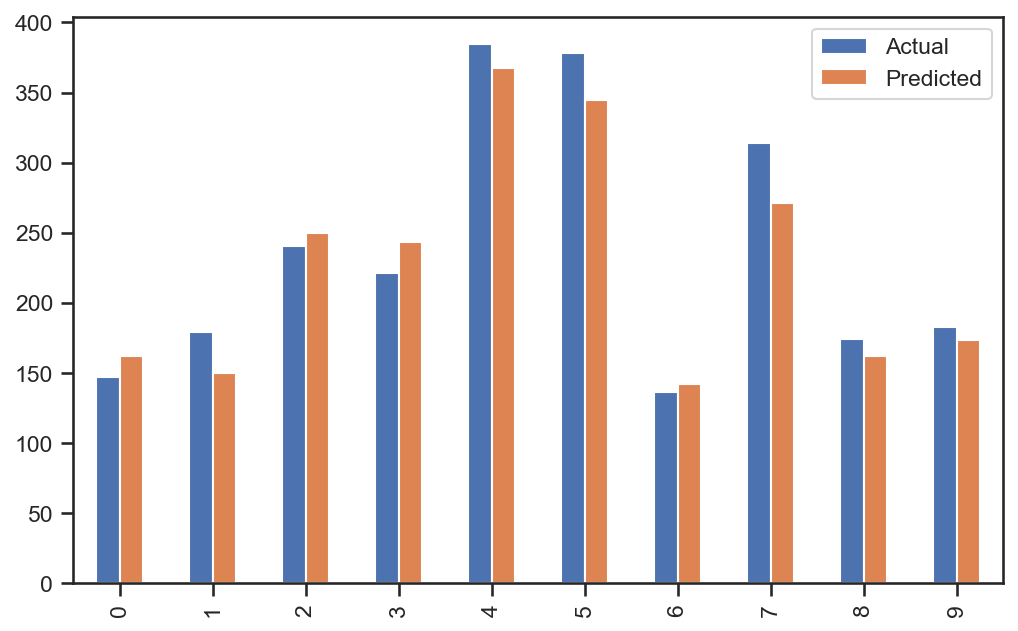

In [51]:
evaluate.head().plot(kind = '')

In [52]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# R2 Score
print(f"R2 score: {r2_score(y_test, y_pred)}")
# Mean Absolute Error (MAE)
print(f"MAE score: {mean_absolute_error(y_test, y_pred)}")
# Mean Squared Error (MSE)
print(f"MSE score: {mean_squared_error(y_test, y_pred)}")

R2 score: -9.482237611893941e+24
MAE score: 7477963019715.408
MSE score: 6.546844695155978e+28
